In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.stats import linregress, norm
from scipy.special import gamma
from catchtools import eezname_to_index, gridbox_areas
from plottools.maps import *

In [2]:
# Custom colormap
redend = np.array(mcolors.to_rgb('firebrick'))
blueend = np.array(mcolors.to_rgb('mediumblue'))
middle = np.array(mcolors.to_rgb('w'))
rslope = (redend - middle)/127
lslope = (middle - blueend)/127
cunits = np.zeros((256,3))
cunits[0,:] = blueend
for i in range(127):
    cunits[i+1,:] = blueend + lslope*(i+1)
cunits[128,:] = middle
for i in range(127):
    cunits[i+129,:] = middle + rslope*(i+1)
cunits[-1,:],redend
BWR = mcolors.ListedColormap(cunits)

In [3]:
catch = xr.open_dataset('data/ind_catch.nc')
sub_catch = xr.open_dataset('data/sub_catch.nc')
sub_hg = xr.open_dataset('data/sub_fish_hg_catch.nc')
dhc_catch = xr.open_dataset('data/ind_dhc_catch.nc')
concentrations = xr.open_dataset('data/fish_hg_concentrations.nc')
seawater_mehg = concentrations['seawater_250m']
seawater_mehg_1000 = concentrations['seawater_1000m']
hg_catch = xr.open_dataset('data/fish_hg_catch.nc')
hg_catch_lower = xr.open_dataset('data/fish_hg_catch_lower.nc')
hg_catch_upper = xr.open_dataset('data/fish_hg_catch_upper.nc')
hg_dhc_catch = xr.open_dataset('data/fish_hg_catch_dhc.nc')
hg_dhc_catch_lower = xr.open_dataset('data/fish_hg_catch_dhc_lower.nc')
hg_dhc_catch_upper = xr.open_dataset('data/fish_hg_catch_dhc_upper.nc')
nutrient_concentrations = xr.open_dataset('data/nutrient_concentrations.nc')

In [4]:
subfishers = np.array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  45,  47,  48,  49,  50,  51,  54,  55,  56,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  81,  82,  83,  84,  85,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  99, 100, 103,
       104, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116, 117,
       120, 121, 122, 123, 124, 125, 126, 128, 129, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 147, 148, 150,
       151, 152, 153, 154, 155, 156, 157, 159, 160, 161, 162, 163, 164,
       165, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 178, 179,
       180, 181, 182, 186, 187, 188, 189, 190, 191, 192, 193, 194, 207,
       208, 209, 210, 214, 215, 217, 218, 221, 222])
fishingentities = pd.read_csv('data/fishingentities.csv')
id2name = {}
name2reg = {}
for i, row in fishingentities.iterrows():
    id2name[row['FishingEntityID']] = row['Name']
    name2reg[row['Name']] = row['BW Region'].lstrip(' ')
subnames = [id2name[f] for f in subfishers]

In [5]:
lats = concentrations['lats'].values
lons = concentrations['lons'].values

gb_areas = gridbox_areas(lats,lons)
plons, plats = np.concatenate((lons-0.5,[lons[-1]+0.5])), np.concatenate((lats-0.5,[lats[-1]+0.5]))

/tmp/ipykernel_6479/1851682637.py:3: RuntimeWarning: divide by zero encountered in log10
  cg = add_gridded(ax, plons, plats, np.log10(seawater_mehg_1000.values[0,:,:]), cmap='viridis',vmin=-2.,vmax=1,)
/home/thackray/.local/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/thackray/.local/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/thackray/.local/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0.

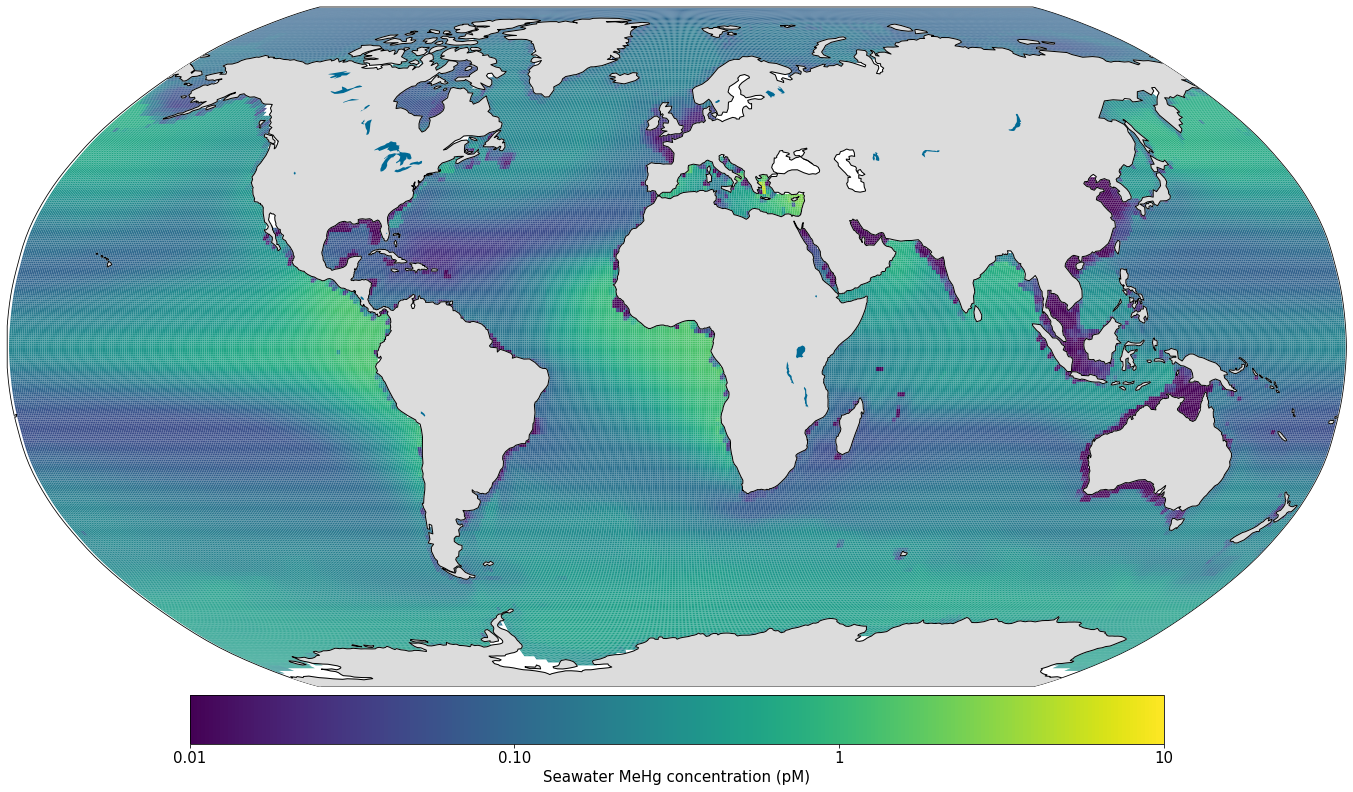

In [6]:
ax = make_map_base(projection='Robinson',proj_args={'central_longitude':-0.5}, figsize=(24,16), land='gainsboro', ocean='w',
    natborders=None)
cg = add_gridded(ax, plons, plats, np.log10(seawater_mehg_1000.values[0,:,:]), cmap='viridis',vmin=-2.,vmax=1,)

add_colorbar(ax, cg, clabel='Seawater MeHg concentration (pM)', logcolor=True, nticks=4)
plt.savefig('figs/paper_seawater_1000m_viridis.png',bbox_inches='tight',dpi=400)
plt.savefig('figs/paper_seawater_1000m_viridis.eps',bbox_inches='tight')

In [7]:
fishers = ['South Asia', 'South East Asia', 'Canada', 'Central America', 'East Asia',
           'Eastern Africa', 'Eastern Europe', 'Former USSR', 'Japan', 'Middle East', 
           'Northern Africa', 'OECD Europe', 'Oceania', 'Other', 'South America', 
           'Southern Africa', 'United States', 'Western Africa']

category_names = {'very low':'Very low','low':'Low','medium':'Medium',
                 'high':'High','albacore':'Albacore tuna','bigeye':'Bigeye tuna',
                 'skipjack':'Skipjack tuna','yellowfin':'Yellowfin tuna',
                 'other tunas':'Other tunas','blue marlin':'Blue marlin',
                 'billfish':'Billfish','king mackerel':'King mackerel',
                 'pollock':'Pollock','salmon':'Salmon','shark_high':'Shark_high',
                 'shark_low':'Shark_low'}
category_names_r = {val:key for key,val in category_names.items()}

In [8]:
cnames = list(category_names.keys())
sub_h, sub_c = {}, {}
[print(x, end=',') for x in ['Fisher']+cnames]
print('')
for sub_fisher in subnames:
    sub_h[sub_fisher] = 0
    sub_c[sub_fisher] = 0
    
    for category in cnames:
        this_h = np.nansum(sub_hg[f'{sub_fisher}_{category}'].values)
        this_c = np.nansum(sub_catch[f'{sub_fisher}_{category}'].values)
        sub_c[sub_fisher] += this_c
        sub_h[sub_fisher] += this_h
for sub_fisher in subnames:
    print(sub_fisher, end=',')
    for category in cnames:
        this_h = np.nansum(sub_hg[f'{sub_fisher}_{category}'].values)
        tot_h = sub_h[sub_fisher]
        if tot_h > 0.001:
            print(f'{100*this_h/tot_h:.0f}', end=',')
    print('')


Fisher,very low,low,medium,high,albacore,bigeye,skipjack,yellowfin,other tunas,blue marlin,billfish,king mackerel,pollock,salmon,shark_high,shark_low,
Albania,2,84,13,1,0,0,0,0,0,0,0,0,0,0,0,0,
Algeria,0,5,7,5,0,0,0,0,1,0,56,0,0,0,27,0,
American Samoa,1,12,87,0,0,0,0,0,0,0,0,0,0,0,1,0,
Angola,0,40,26,5,0,0,0,0,0,0,0,0,0,0,29,0,
Antigua & Barbuda,0,55,42,0,0,0,0,0,0,0,0,0,0,0,2,0,
Argentina,0,14,86,0,0,0,0,0,0,0,0,0,0,0,0,0,
Australia,1,24,39,1,0,0,0,0,3,0,0,0,0,0,33,0,
Bahamas,1,75,24,1,0,0,0,0,0,0,0,0,0,0,0,0,
Bahrain,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
Bangladesh,1,49,50,0,0,0,0,0,0,0,0,0,0,0,0,0,
Barbados,1,36,44,0,0,0,0,0,0,0,0,0,0,0,19,0,
Belgium,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
Bermuda (UK),0,5,14,67,0,0,0,13,0,0,0,0,0,0,0,0,
Bosnia & Herzegovina,0,94,2,0,0,0,0,0,4,0,0,0,0,0,0,0,
Brazil,0,44,52,0,0,0,0,0,0,0,0,0,0,0,3,0,
Belize,0,13,76,10,0,0,0,0,0,0,0,1,0,0,0,0,
Solomon Isl.,0,20,79,0,0,0,0,0,2,0,0,0,0,0,0,0,
British Virgin Isl. (UK),0,37,62,0,0,0,0,0,0,0,0,0,0,0,0,0,
Brunei Da

In [9]:
sub_concentrations = {}
for sub_fisher in subnames:
    sub_concentrations[sub_fisher] = sub_h[sub_fisher] / sub_c[sub_fisher]

In [10]:
reference_consumption = {}
reference_gpd = {}
bw_regions = ['Asia', 'Europe', 'Africa', 'Latin America', 'North America', 'Oceania', 'Islands']
bw_distributions = {'Asia': norm(57.7,11.54),
                    'Europe': norm(70.8, 14.16),
                    'Africa': norm(60.7, 12.14),
                    'Latin America': norm(67.9, 13.58),
                    'North America': norm(80.7, 16.14),
                    'Oceania': norm(74.1, 14.82),
                    'Islands': norm(np.mean([57.7, 70.8, 60.7, 67.9, 80.7, 74.1]), 
                                    np.mean([11.54, 14.16, 12.14, 13.58, 16.14, 14.82]))}
Rfd = 0.1

In [11]:
N = 10000
np.random.seed(42)
reference_consumption_gpd = {}
for country, conc in sub_concentrations.items():
    samples_gpd = np.zeros(N)
    bw_reg = name2reg[country]
    if bw_reg == 'None':
        continue
    for i in range(N):
        bw = bw_distributions[bw_reg].rvs()
        gpd = Rfd * bw / conc
        samples_gpd[i] = gpd
    reference_consumption_gpd[country] = samples_gpd

/tmp/ipykernel_6479/3270359770.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  gpd = Rfd * bw / conc


In [12]:
print('Fishing Entity,avg. MeHg concentration,mean reference consumption (g/day),5th quantile,25th quantile,50th quantile,75th quantile,95th quantile')
for country, samples in reference_consumption_gpd.items():
    fe, mehg, mean, q5, q25, q50, q75, q95 = (country, sub_concentrations[country], np.mean(samples), 
                                        np.quantile(samples, 0.05), np.quantile(samples, 0.25), 
                                        np.quantile(samples, 0.5),
                                        np.quantile(samples, 0.75), np.quantile(samples, 0.95))
    if mehg > 0.005:
        print(f'{country},{mehg:.2f},{mean:.1f},{q5:.1f},{q25:.1f},{q50:.1f},{q75:.1f},{q95:.1f}')

Fishing Entity,avg. MeHg concentration,mean reference consumption (g/day),5th quantile,25th quantile,50th quantile,75th quantile,95th quantile
Albania,0.01,700.9,469.1,606.8,700.8,795.3,931.5
Algeria,0.45,13.5,9.1,11.7,13.5,15.4,18.0
American Samoa,0.11,62.2,42.2,53.6,62.3,70.6,82.7
Angola,0.13,47.7,32.0,41.1,47.6,54.2,63.2
Antigua & Barbuda,0.06,105.0,70.2,90.9,105.0,119.2,139.6
Argentina,0.11,59.8,39.8,51.6,59.8,68.0,79.5
Australia,0.10,71.3,48.1,61.6,71.4,80.8,94.3
Bahamas,0.05,125.8,84.4,108.8,125.7,142.8,168.2
Bahrain,0.05,127.8,85.2,110.9,127.5,144.6,170.1
Bangladesh,0.08,72.5,48.7,62.7,72.5,82.3,96.3
Barbados,0.08,84.2,56.5,73.0,84.2,95.6,111.4
Belgium,0.05,152.6,102.3,131.9,152.9,172.8,203.7
Bermuda (UK),0.16,42.1,28.4,36.5,42.1,47.8,55.8
Bosnia & Herzegovina,0.05,150.9,101.1,130.5,150.6,171.5,200.7
Brazil,0.08,90.1,60.5,77.8,90.2,102.4,119.6
Belize,0.12,57.2,38.6,49.5,57.1,64.7,75.8
Solomon Isl.,0.10,66.6,44.7,57.6,66.6,75.5,88.8
British Virgin Isl. (UK),0.08,87.4,58.9,75.7,87

/home/thackray/.local/lib/python3.9/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [13]:
total_hg = np.zeros_like(np.squeeze(hg_catch['South Asia_very low'].values))
total_hg_lower = np.zeros_like(np.squeeze(hg_catch['South Asia_very low'].values))
total_hg_upper = np.zeros_like(np.squeeze(hg_catch['South Asia_very low'].values))
total_THg = np.zeros_like(np.squeeze(hg_catch['South Asia_very low'].values))
fish_THg_dhc = np.zeros_like(np.squeeze(hg_catch['South Asia_very low'].values))
total_dhc_catch = np.zeros_like(np.squeeze(hg_catch['South Asia_very low'].values))
total_nondhc_catch = np.zeros_like(np.squeeze(hg_catch['South Asia_very low'].values))
total_sub_hg = np.zeros_like(np.squeeze(hg_catch['South Asia_very low'].values))
total_sub_catch = np.zeros_like(np.squeeze(hg_catch['South Asia_very low'].values))
fish_hg_dhc = np.zeros_like(np.squeeze(hg_catch['South Asia_very low'].values))
fish_hg_dhc_lower = np.zeros_like(np.squeeze(hg_catch['South Asia_very low'].values))
fish_hg_dhc_upper = np.zeros_like(np.squeeze(hg_catch['South Asia_very low'].values))
reg_dhc_hg = {}
cat_dhc_catch = {}
cat_dhc_hg = {}
for category in category_names:
    cat_dhc_catch[category] = np.zeros_like(total_dhc_catch)
    cat_dhc_hg[category] = np.zeros_like(total_dhc_catch)

for fisher in fishers:
    reg_dhc_hg[fisher] = 0
    for category in category_names:
        total_hg += np.squeeze(hg_catch[f'{fisher}_{category}'].values)
        total_hg_lower += np.squeeze(hg_catch_lower[f'{fisher}_{category}'].values)
        total_hg_upper += np.squeeze(hg_catch_upper[f'{fisher}_{category}'].values)
        if category in ["very low"]:
            total_THg += 0.5*np.squeeze(hg_catch[f'{fisher}_{category}'].values/0.4) + 0.5*np.squeeze(hg_catch[f'{fisher}_{category}'].values/0.95)
            fish_THg_dhc += 0.5*np.squeeze(hg_dhc_catch[f'{fisher}_{category}'].values/0.4) + 0.5*np.squeeze(hg_dhc_catch[f'{fisher}_{category}'].values/0.95)
        else:
            total_THg += np.squeeze(hg_catch[f'{fisher}_{category}'].values/0.95)
            fish_THg_dhc += np.squeeze(hg_dhc_catch[f'{fisher}_{category}'].values/0.95)
        total_dhc_catch += np.squeeze(dhc_catch[f'{fisher}_{category}'].values)
        total_nondhc_catch += np.squeeze(catch[f'{fisher}_{category}'].values)
        fish_hg_dhc += np.squeeze(hg_dhc_catch[f'{fisher}_{category}'].values)
        fish_hg_dhc_lower += np.squeeze(hg_dhc_catch_lower[f'{fisher}_{category}'].values)
        fish_hg_dhc_upper += np.squeeze(hg_dhc_catch_upper[f'{fisher}_{category}'].values)
        cat_dhc_catch[category] += np.squeeze(dhc_catch[f'{fisher}_{category}'].values)
        cat_dhc_hg[category] += np.squeeze(hg_dhc_catch[f'{fisher}_{category}'].values)
        reg_dhc_hg[fisher] += np.nansum(hg_dhc_catch[f'{fisher}_{category}'].values)
for fisher in subnames:
    for category in category_names:
        total_sub_hg += np.squeeze(sub_hg[f'{fisher}_{category}'].values)
        total_sub_catch += np.squeeze(sub_catch[f'{fisher}_{category}'].values)
cat_dhc_catchsum = {key:np.nansum(val) for key,val in cat_dhc_catch.items()}
tot_cat = 0
for cat,val in cat_dhc_catchsum.items():
    tot_cat += val
cat_dhc_fracs = {key:val/tot_cat for key,val in cat_dhc_catchsum.items()}

In [14]:
total_dhc_catch.sum()/total_nondhc_catch.sum(), np.nansum(total_hg), np.nansum(fish_hg_dhc)

(0.7725099132044669, 6095899.915008516, 5065192.888219906)

In [15]:
np.nansum(total_hg_lower), np.nansum(fish_hg_dhc_lower),np.nansum(total_hg_upper), np.nansum(fish_hg_dhc_upper)

(4058272.657996182, 3502971.7433572807, 10033312.177351618, 8114207.482981121)

In [16]:
# Hg
print('fisher', end=',')
for category in category_names:
    print(category, end=',')
print('')
for fisher in subnames:
    print(fisher, end=',')
    fisher_hg = [np.nansum(sub_hg[f'{fisher}_{category}'].values) for category in category_names]
    fisher_tot_hg = np.sum(fisher_hg)
    for hg in fisher_hg:
        if fisher_tot_hg > 0:
            print(f'{hg/fisher_tot_hg:.3f}', end=',')
        else:
            print(0, end=',')
    if fisher_tot_hg > 0:
        print(f'{sub_concentrations[fisher]:.3f}')
    else:
        print('')

fisher,very low,low,medium,high,albacore,bigeye,skipjack,yellowfin,other tunas,blue marlin,billfish,king mackerel,pollock,salmon,shark_high,shark_low,
Albania,0.019,0.840,0.129,0.011,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.010
Algeria,0.000,0.046,0.072,0.045,0.000,0.000,0.000,0.000,0.013,0.000,0.557,0.000,0.000,0.000,0.267,0.000,0.450
American Samoa,0.006,0.122,0.865,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.006,0.000,0.110
Angola,0.000,0.399,0.259,0.054,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.287,0.000,0.127
Antigua & Barbuda,0.000,0.554,0.423,0.000,0.000,0.000,0.000,0.000,0.004,0.000,0.000,0.000,0.000,0.000,0.018,0.000,0.065
Argentina,0.000,0.144,0.856,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.114
Australia,0.007,0.243,0.386,0.006,0.000,0.000,0.000,0.003,0.025,0.000,0.000,0.000,0.000,0.000,0.330,0.000,0.104
Bahamas,0.007,0.749,0.238,0.007,0.000,0.000,0.000,0.000,0.0

/home/thackray/.local/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/thackray/.local/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/thackray/.local/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/home/thackray/.local/lib/python3.9/site-packages/cartopy/crs.py:385: Shapel

lon,lat,obs,model (cell),seawater (250m)
0,55.3,-21.7,0.17,0.04,0.006
1,44.0,-15.0,0.10,0.06,0.031
2,55.0,-4.0,0.21,0.18,0.203
3,78.9,6.2,0.16,0.38,0.487
4,-70.0,42.0,0.26,0.47,0.606
5,-78.0,32.0,0.47,0.13,0.128
6,-16.3,28.8,0.33,0.07,0.046
7,-80.0,27.0,0.36,0.06,0.033
8,18.0,-34.0,0.48,0.12,0.112
9,-35.0,0.0,0.15,0.11,0.102
10,-90.0,25.0,0.13,0.06,0.027
11,111.4,14.6,0.13,0.15,0.154
12,119.8,23.4,0.27,0.05,0.014
13,-160.0,20.0,0.20,0.06,0.030
14,144.0,16.0,0.06,0.06,0.035
15,-178.0,-25.0,0.12,0.06,0.035
16,160.0,5.0,0.10,0.09,0.078
17,180.0,-10.0,0.13,0.04,0.000
18,-140.0,-15.0,0.13,0.06,0.024
19,170.0,0.0,0.10,0.14,0.147
20,-88.0,0.0,0.81,0.67,0.903
21,0.0,4.0,0.62,0.82,1.109
22,-114.0,25.0,0.28,0.21,0.248
23,-120.0,28.0,0.72,0.15,0.151
24,-115.0,0.0,1.96,0.40,0.515
25,-135.0,0.0,1.53,0.27,0.332
26,-155.0,0.0,0.29,0.21,0.243
27,-82.3,6.5,0.66,0.65,0.862
28,-115.0,15.0,0.72,0.22,0.263


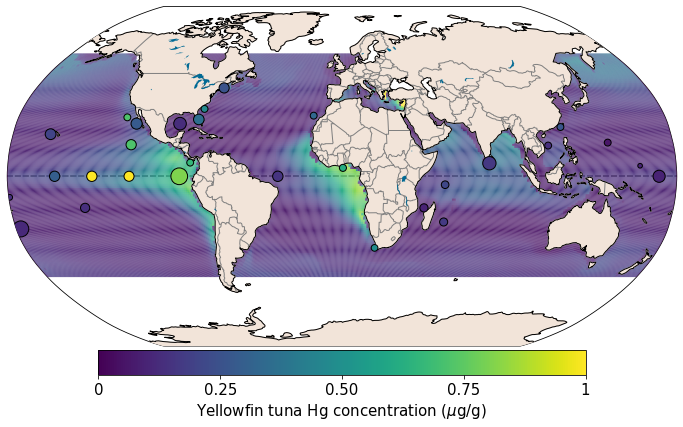

In [17]:
tuna = concentrations['yellowfin'].values.squeeze()
seawater = seawater_mehg.values.squeeze()
df = pd.read_csv(f'data/yellowfin_power_aggregated.csv')[['Ocean (site)','Hg conc. at 98cm','Lat','Lon',
                                        'n','Size (cm)','Weight (kg)','Coefficient of Variance (CV)']]
#tuna = np.where(tuna<0.08, np.nan, tuna)
catchnan = np.where(cat_dhc_catch['yellowfin']>0.,1,np.nan)
#catchnan = np.zeros_like(catchnan); 
catchnan[84:-62,:]=1
ax = make_map_base(projection='Robinson',proj_args={'central_longitude':-0.5}, figsize=(12,8), land='#f2e4d9', ocean='w')
cg = add_gridded(ax, lons-0.5, lats, tuna*catchnan, cmap='viridis', vmin=0.0, vmax=1)

choose = df['Weight (kg)'] > 0
tunalats, tunalons = df['Lat'][choose], df['Lon'][choose]
tunahg1 = df['Hg conc. at 98cm'][choose]*0.95
sslist = df['n'][choose]

cc = add_points(ax, tunalons, tunalats, tunahg1, scatter_size=15*sslist**0.5, edgecolor='k',
                cmap='viridis', vmin=0.0, vmax=1)

add_colorbar(ax, cg, clabel='Yellowfin tuna Hg concentration ($\mu$g/g)', logcolor=False, nticks=5)
[plt.axhline(x,linestyle='--',color='gray',alpha=0.75) for x in [-66,-35,-23,0,23,35,66]]
plt.savefig(f'figs/tunacomp_nonumbers.png',bbox_inches='tight',dpi=500)
plt.savefig(f'figs/tunacomp_nonumbers.eps',bbox_inches='tight')

tunamod, tunastd, tunamax, tunamin = [], [], [], []
print('lon,lat,obs,model (cell),seawater (250m)')
for cc, (la,lo,tu) in enumerate(zip(tunalats,tunalons,tunahg1)):
    i,j = np.argmin(np.abs(lats-la)),np.argmin(np.abs(lons-lo))
    tunamod.append(tuna[i,j])
    

    print(f'{cc},{lo},{la},{tu:.2f},{tuna[i,j]:.2f},{seawater[i,j]:.3f}')

In [18]:
CountryData = pd.read_csv('data/country_data.csv')
RegionCatchHg = {}
for fisher in fishers:
    RegionCatchHg[fisher] = 0
    for category in category_names:
        RegionCatchHg[fisher] += hg_dhc_catch[f'{fisher}_{category}'].sum().values

/home/thackray/.local/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/thackray/.local/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/thackray/.local/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/home/thackray/.local/lib/python3.9/site-packages/cartopy/crs.py:385: Shapel

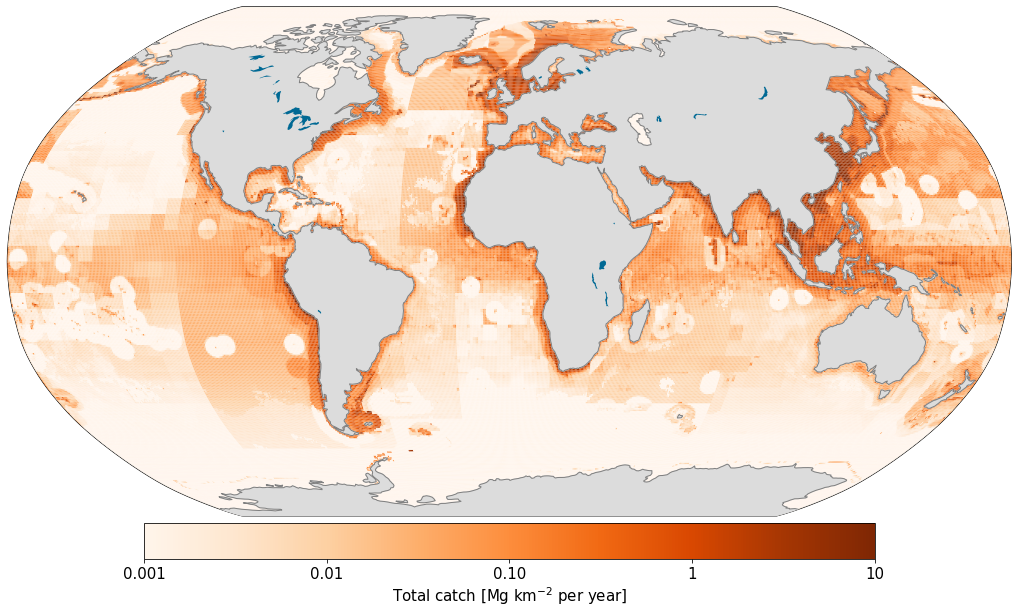

In [19]:
plotdata1 = total_nondhc_catch/(gb_areas*1e-6) # Mg per km2
plotdata1 = np.log10(plotdata1+1e-4)

countries = []
cdata = []
for name, samples in reference_consumption.items():
    countries.append(name.replace(',',';'))
    cdata.append(np.mean(samples))
cmap = 'Blues'
cmap = 'Oranges'
ax = make_map_base(projection='Robinson', proj_args={'central_longitude':-0.5}, figsize=(18,12), ocean='white',
                        land='gainsboro', natborders=None, coastlines='gray')
cg = add_gridded(ax, lons-0.5, lats, plotdata1, cmap=cmap, vmin=-3, vmax=1)

add_colorbar(ax, cg, clabel='Total catch [Mg km$^{-2}$ per year]', logcolor=True, nticks=5)

plt.savefig(f'figs/paper_total_catch_orange.png',bbox_inches='tight',dpi=500)
plt.savefig(f'figs/paper_total_catch_orange.eps',bbox_inches='tight',dpi=500)

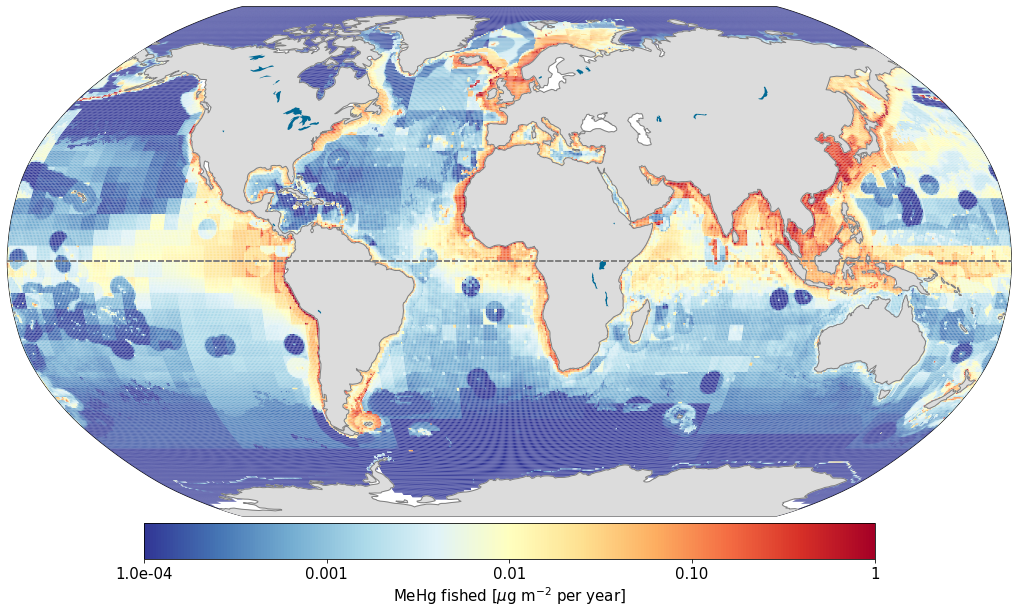

In [20]:
plotdata1 = total_hg/(gb_areas*1e-6) # g per km2  =  ug per m2
plotdata1 = np.log10(plotdata1+1e-4)

cmap = 'RdYlBu_r'
ax = make_map_base(projection='Robinson', proj_args={'central_longitude':-0.5}, figsize=(18,12), ocean='white',
                        land='gainsboro', natborders=None, coastlines='gray')
cg = add_gridded(ax, lons-0.5, lats, plotdata1, cmap=cmap, vmin=-4, vmax=0)

add_colorbar(ax, cg, clabel='MeHg fished [$\mu$g m$^{-2}$ per year]', logcolor=True, nticks=5)

[plt.axhline(x,linestyle='--',color='gray',alpha=0.75,zorder=6000) for x in [-66,-35,-23,0,23,35,66]]
plt.savefig(f'figs/paper_mehg_fished_foragetoo_{cmap}.png',bbox_inches='tight',dpi=500)

/home/thackray/Dropbox/git/global_fish_mehg/plottools/maps.py:455: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  geo[0]
/home/thackray/.local/lib/python3.9/site-packages/cartopy/feature/__init__.py:217: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  self._geoms = tuple(geometries)
/home/thackray/.local/lib/python3.9/site-packages/cartopy/feature/__init__.py:217: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  self._geoms = tuple(geometries)
/home/thackray/Dropbox/git/global_fish_mehg/plottools/maps.py:468: ShapelyDepreca

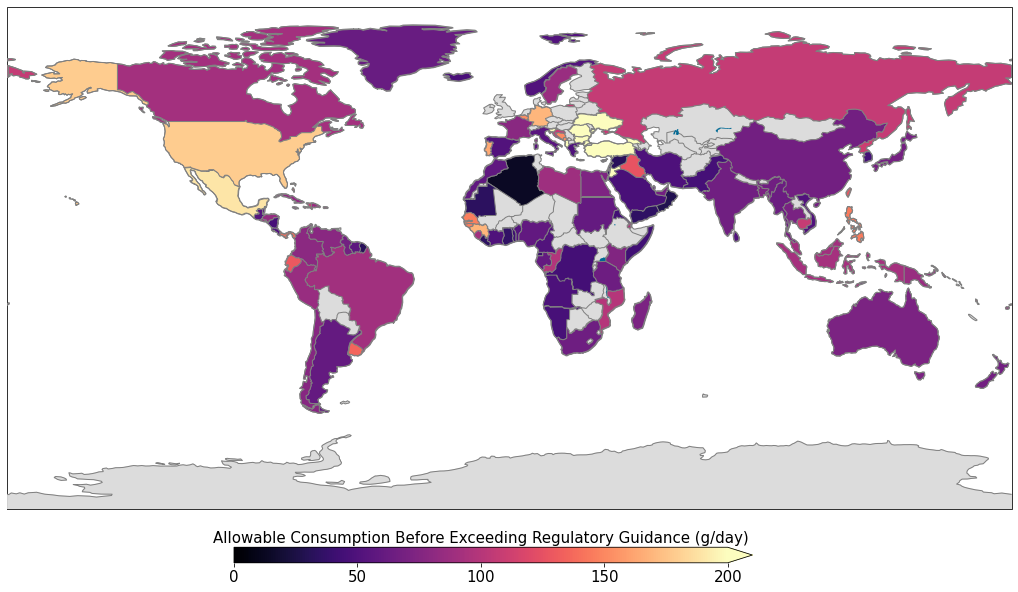

In [21]:

plotdata1 = fish_hg_dhc/(gb_areas*1e-6) # g per km2  =  ug per m2
plotdata1 = np.log10(plotdata1+1e-4)

countries = []
cdata = []
for name, samples in reference_consumption_gpd.items():
    countries.append(name.replace(',',';'))
    sample_mean = np.mean(samples)#*7/30
    cdata.append(sample_mean)
ax = make_map_base(projection='flat', proj_args={'central_longitude':-0.5}, figsize=(18,12), ocean='white',
                        land='gainsboro', natborders='gray', coastlines='gray')

mapname = 'segments_reds'
from matplotlib.colors import ListedColormap
from matplotlib.cm import get_cmap
cmap = 'magma'

YOB = get_cmap(cmap)

segmap = ListedColormap([YOB(ci) for ci in [0,0.33333,0.66667,1.0]])
cc = add_countries(ax, countries, cdata, cmap=YOB, vmin=0, vmax=200, edgecolor='gray')

cax = plt.axes((0.3,0.15,0.4,0.018))


cbar = plt.colorbar(cc, cax, orientation='horizontal', extend='max')

cbar.ax.set_xlabel('Allowable Consumption Before Exceeding Regulatory Guidance (g/day)', fontdict={'size':15})
cbar.ax.xaxis.set_label_position('top')
cbar.ax.xaxis.set_ticks_position('bottom')

cbar.ax.set_xticks([0.,50,100,150,200])

cbar.ax.set_xticklabels(['0','50','100','150','200'],fontsize=15)

plt.savefig(f'figs/paper_mehg_fished_subcountries_reference_categories_gday_{cmap}.png',bbox_inches='tight',dpi=500)
plt.savefig(f'figs/paper_mehg_fished_subcountries_reference_categories_gday_{cmap}.eps',bbox_inches='tight',dpi=500)

In [22]:
hg_concentration = fish_hg_dhc/total_dhc_catch
se = np.squeeze(nutrient_concentrations['Selenium'].values)*1e-2 # to ug/g from ug/100g
se = np.where(se==0, np.nan, se)
om3 = np.squeeze(nutrient_concentrations['Omega3'].values)*1e-2*1e6 # to ug/g from g / 100g
om3 = np.where(om3==0, np.nan, om3)

/tmp/ipykernel_6479/2459338734.py:1: RuntimeWarning: invalid value encountered in true_divide
  hg_concentration = fish_hg_dhc/total_dhc_catch


In [23]:
import rasterio as rio
import catchtools as ct
img = rio.open('data/SAUEEZ_July2015/SAUEEZ_July2015.tiff')
eezraw = np.squeeze(img.read())[::-1,:]
eezraw = ct.regrid_down(eezraw)

hg_eez = np.zeros_like(hg_concentration)
for eez in np.unique(eezraw):
    hg_here = np.where(eezraw==eez,hg_concentration,np.nan)
    hg_eez = np.where(eezraw==eez, np.nanmean(hg_here), hg_eez)

/tmp/ipykernel_6479/3118553137.py:10: RuntimeWarning: Mean of empty slice
  hg_eez = np.where(eezraw==eez, np.nanmean(hg_here), hg_eez)


In [24]:
colors2 = plt.cm.Greys(np.linspace(0., 0.75, 128))
colors1 = plt.cm.Spectral(np.linspace(0., 0.5, 128))

colors = plt.cm.RdBu(np.linspace(0.12,0.88,256))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

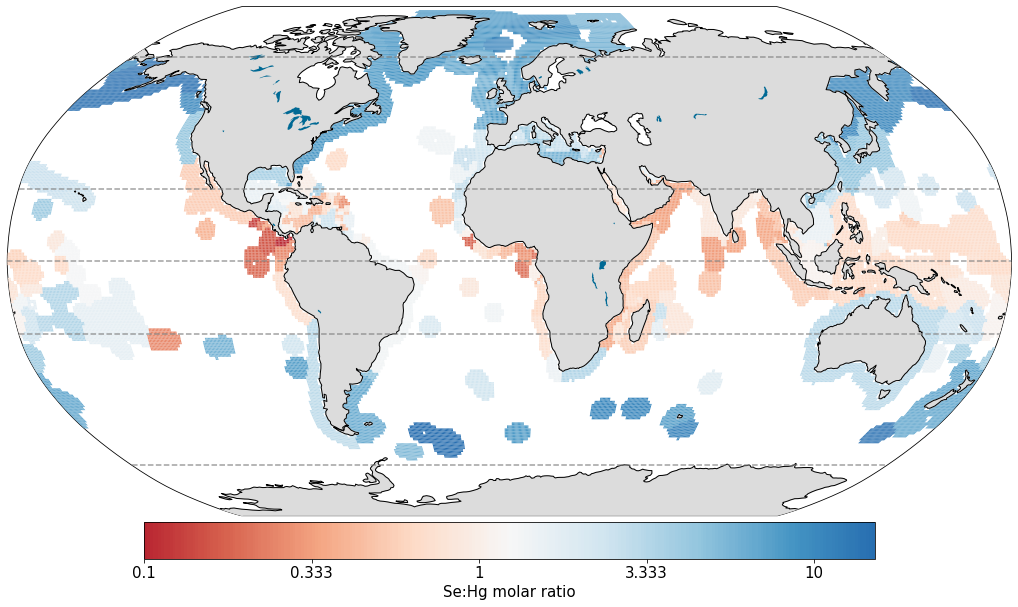

In [25]:
hgse = hg_eez/se*79/201
data = np.log10(1/hgse)
dmin, dmax = np.nanmin(data), np.nanmax(data)
ax = make_map_base(projection='Robinson',proj_args={'central_longitude':-0.5}, figsize=(18,12), land='gainsboro', ocean='w',natborders=None)
cg = add_gridded(ax, lons+0., lats+0.25, data, cmap=mymap, vmin=-1, vmax=dmax)

cbar = add_colorbar(ax, cg, clabel='Se:Hg molar ratio', logcolor=True, nticks=5)
cbar.ax.set_xticks([-1,-0.5,0.,0.5,1])
cbar.ax.set_xticklabels(['0.1','0.333','1','3.333','10'])
[ax.plot([-180,180],[x,x],linestyle='--',color='gray',alpha=0.75,transform=ccrs.PlateCarree(),zorder=6000) for x in [-66,-23,23,66]]
plt.axhline(0,linestyle='--',color='gray',alpha=0.75,zorder=6000)
plt.savefig('figs/hgse_ratio.png',bbox_inches='tight',dpi=500)

/home/thackray/Dropbox/git/global_fish_mehg/plottools/maps.py:399: RuntimeWarning: divide by zero encountered in log10
  m = np.log10(abs(x))


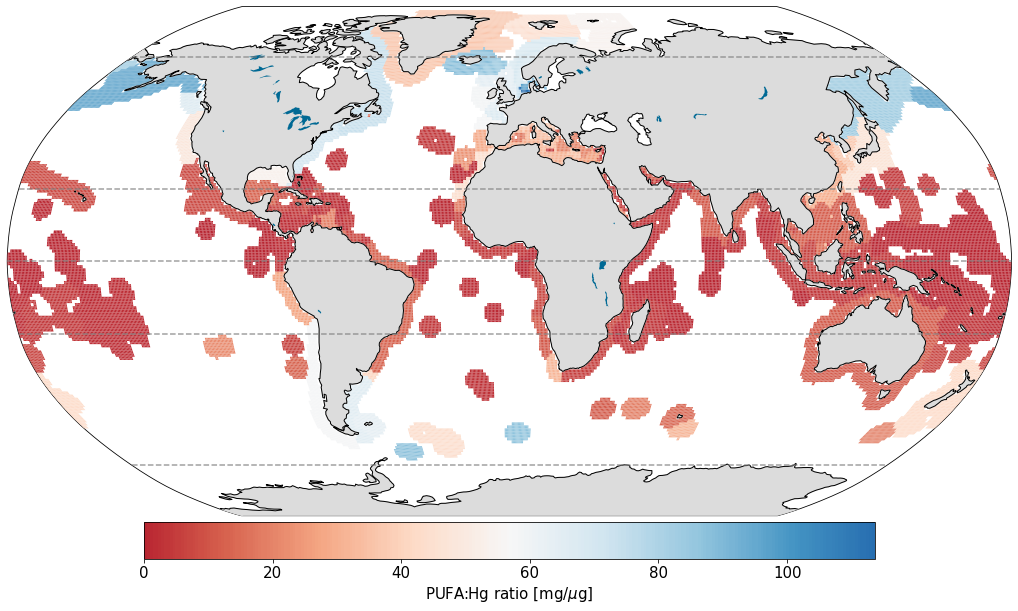

In [26]:
hgom3 = 1000*hg_eez/om3 # per ug/g to per mg/g
data = 1/hgom3
dmax = np.nanmax(data)
ax = make_map_base(projection='Robinson',proj_args={'central_longitude':-0.5}, figsize=(18,12), land='gainsboro', ocean='w',natborders=None)
cg = add_gridded(ax, lons+0., lats+0.25, data, cmap=mymap, vmin=0, vmax=dmax)

cbar = add_colorbar(ax, cg, clabel='PUFA:Hg ratio [mg/$\mu$g]', logcolor=False, nticks=5)
cbar.ax.set_xticks([0,20,40,60,80,100])
cbar.ax.set_xticklabels([0,20,40,60,80,100])
[ax.plot([-180,180],[x,x],linestyle='--',color='gray',alpha=0.75,transform=ccrs.PlateCarree(),zorder=6000) for x in [-66,-23,23,66]]
plt.axhline(0,linestyle='--',color='gray',alpha=0.75,zorder=6000)
plt.savefig('figs/hgomega3_ratio.png',bbox_inches='tight',dpi=500)

In [27]:
zone_limits = {'tropical': (-23.0, 23.0),
              'subtropical North': (23.01, 35.0),
              'subtropical South': (-35.0, -23.01),
              'temperate North': (35.01, 66.0),
              'temperate South': (-66.0, -35.01),
              'polar North': (66.01, 90.),
              'polar South': (-90., -66.01)}
              
def inzone(zone, lat):
    zmin, zmax = zone_limits[zone]
    return (zmin <= lat <= zmax)

In [28]:
eez_reg_df = pd.read_csv('data/EEZ_regions.csv')
eez_reg = {row['EEZ']:row['Region'] for i,row in eez_reg_df.iterrows()}
img = rio.open('data/SAUEEZ_July2015/SAUEEZ_July2015.tiff')
eezraw = np.squeeze(img.read())[::-1,:]
eezraw = ct.regrid_down(eezraw)
nutrients = pd.read_csv("data/fish_nutrients_nations.csv")
print('EEZ,Catch,Se,Omega3,Hg,Hg:Se,Hg:Omega3,tropical,subtropical North,subtropical South,temperate North,temperate South,polar North,polar South,region')
for i,row in nutrients.iterrows():
    eez, this_se, this_om3, this_catch = row['EEZ'], row['Selenium'], row['Omega3'], row['Catch']
    eezind = eezname_to_index[eez]
    region_name = eez_reg[eez]
    try:
        this_hg = np.unique(np.where(eezraw==eezind, hg_eez, np.nan))
        this_hg = this_hg[~np.isnan(this_hg)][0]
        this_hgse = np.unique(np.where(eezraw==eezind, hgse, np.nan))
        this_hgse = this_hgse[~np.isnan(this_hgse)][0]
        this_hgom3 = np.unique(np.where(eezraw==eezind, hgom3, np.nan))
        this_hgom3 = this_hgom3[~np.isnan(this_hgom3)][0]
        this_lats = np.unique(np.where(eezraw==eezind)[0])
        minlat, maxlat = lats[np.min(this_lats)], lats[np.max(this_lats)]
        zonage = []
        for zone in ['tropical','subtropical North','subtropical South','temperate North','temperate South','polar North','polar South']:
            isit = inzone(zone,minlat)
            isit = isit or inzone(zone,maxlat)
            zonage.append(isit)
        zonage = [str(x) for x in zonage]
        print(f'{eez},{this_catch},{this_se*1e-2:.3f},{this_om3*1e4:.1f},{this_hg:.3f},{this_hgse:.3f},{this_hgom3:.2e},{",".join(zonage)},{region_name}')
    except IndexError:
        print(f'{eez} excluded')

EEZ,Catch,Se,Omega3,Hg,Hg:Se,Hg:Omega3,tropical,subtropical North,subtropical South,temperate North,temperate South,polar North,polar South,region
Albania,3.454033057,0.116,3566.6,0.285,0.970,8.00e-02,False,False,False,True,False,False,False,Eastern Europe
Algeria,210.2952594,0.117,3345.8,0.111,0.371,3.31e-02,False,True,False,True,False,False,False,Northern Africa
American Samoa excluded
Andaman & Nicobar Isl. (India),70.33808946,0.064,440.6,0.456,2.816,1.04e+00,True,False,False,False,False,False,False,South Asia
Angola,379.0923304,0.071,2137.5,0.290,1.599,1.36e-01,True,False,False,False,False,False,False,Southern Africa
Anguilla (UK),0.7083605815,0.022,355.2,0.128,2.263,3.60e-01,True,False,False,False,False,False,False,Central America
Antigua & Barbuda,3.598065515,0.014,19.0,0.128,3.668,6.70e+00,True,False,False,False,False,False,False,Central America
Argentina,500.5263741,0.293,7519.2,0.115,0.155,1.54e-02,False,False,True,False,True,False,False,South America
Aruba (Netherlands),0.850

In [29]:
# do quartiles of distribution of conc and dist of catch:
# map high-high, high-low, low-low, low-high
mycatch = np.where(total_dhc_catch<1e-2,np.nan,total_dhc_catch)
flat_hg = hg_concentration.flatten()
flat_catch = mycatch.flatten()
hg25, hg75 = np.nanquantile(flat_hg,(0.25,0.75))
c25, c75 = np.nanquantile(flat_catch,(0.25,0.75))
hg25, hg75, c25, c75

(0.06887193560611599,
 0.20857618841640346,
 3.1298965232222162,
 88.95581612238016)

/home/thackray/.local/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/thackray/.local/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/thackray/.local/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/home/thackray/.local/lib/python3.9/site-packages/cartopy/crs.py:385: Shapel

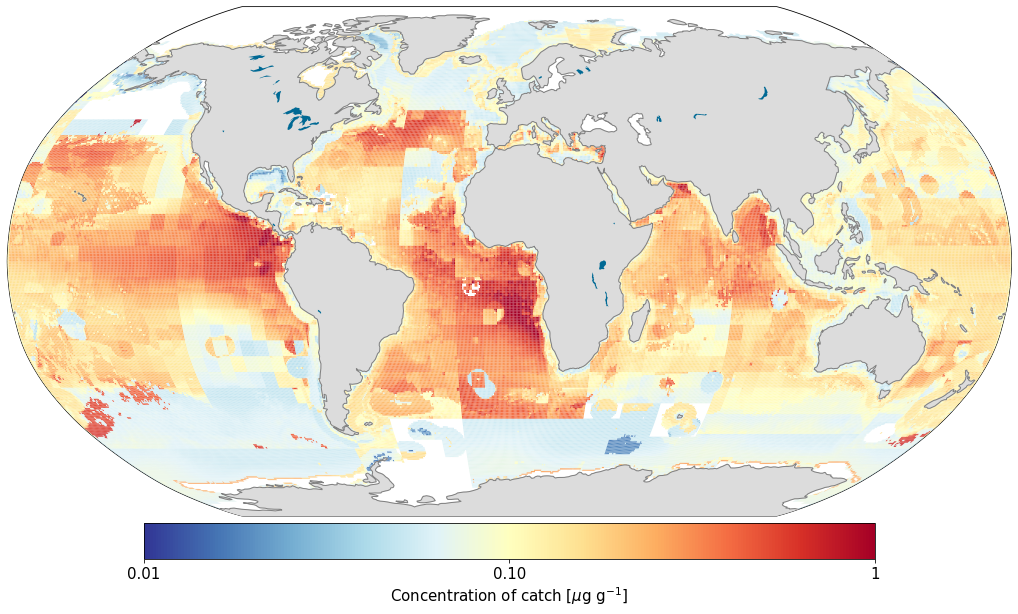

In [30]:
plotdata1 = hg_concentration # g per km2  =  ug per m2
plotdata1 = np.log10(plotdata1+1e-4)

countries = []

cmap = 'RdYlBu_r'
ax = make_map_base(projection='Robinson', proj_args={'central_longitude':-0.5}, figsize=(18,12), ocean='white',
                        land='gainsboro', natborders=None, coastlines='gray')
cg = add_gridded(ax, lons-0.5, lats, plotdata1, cmap=cmap, vmin=-2, vmax=0)

add_colorbar(ax, cg, clabel='Concentration of catch [$\mu$g g$^{-1}$]', logcolor=True, nticks=3)

plt.savefig(f'figs/paper_concentration_catch.png',bbox_inches='tight',dpi=500)

In [31]:
high_hg = np.where(hg_concentration > hg75, 1, 0)
low_hg = np.where(hg_concentration < hg25, 1, 0)
high_catch = np.where(mycatch > c75, 1, 0)
low_catch = np.where(mycatch < c25, 1, 0)

hhll = np.where(high_catch & high_hg, 2, 0)
where_hh = np.where(high_catch & high_hg, 1, 0)
hhll = np.where(low_catch & low_hg,-2, hhll)
where_ll = np.where(low_catch & low_hg, 1, 0)
hhll = np.where(low_catch & high_hg,1, hhll)
hhll = np.where(high_catch & low_hg,-1, hhll)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


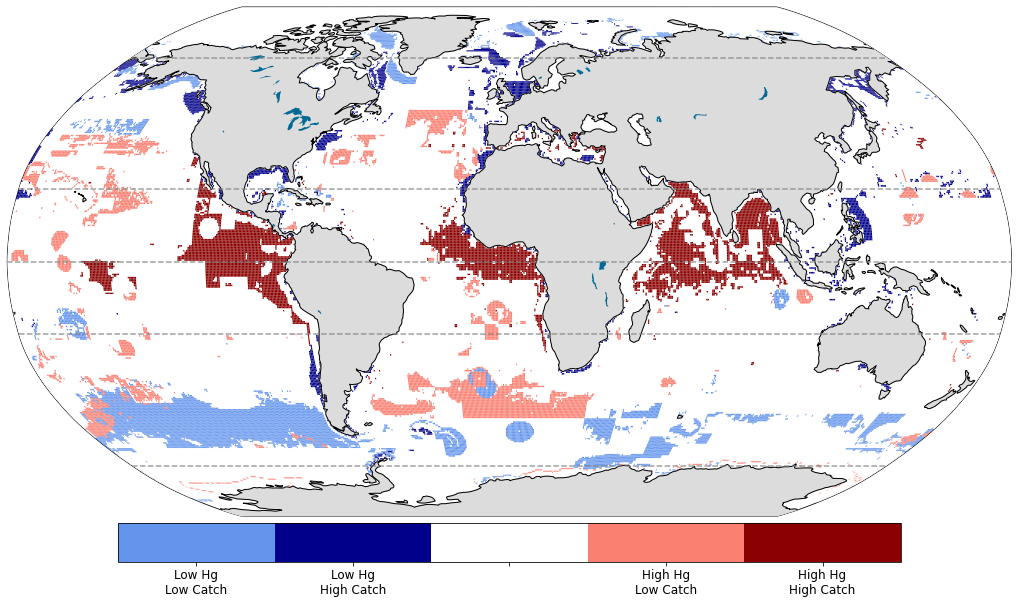

In [32]:
bathy = np.loadtxt('data/bathy05x05.txt')[1:,:-1]
landmask = np.where(bathy>=0,1,0)
landnan = np.where(landmask,np.nan,1)

ax = make_map_base(projection='Robinson',proj_args={'central_longitude':-0.5}, figsize=(18,12), land='gainsboro', ocean='white', natborders=None) # land='#f2e4d9'
quadcolors = ['cornflowerblue','darkblue',(1.0,1.0,1.0,1),'salmon','darkred']
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', quadcolors, len(quadcolors))
bounds = [-2.5,-1.75,-0.75,0.75,1.25,2.5]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cg = add_gridded(ax, lons-0., lats+0.25, hhll*landnan, cmap=cmap,vmin=-2.5,vmax=2.5)
cbar = plt.colorbar(cg, orientation='horizontal', ticks=[-2.,-1.,0,1.,2.], fraction=0.06, pad=0.01)
quadnames = ['Low Hg\nLow Catch','Low Hg\nHigh Catch',' ','High Hg\nLow Catch','High Hg\nHigh Catch']
[ax.plot([-180,180],[x,x],linestyle='--',color='gray',alpha=0.75,transform=ccrs.PlateCarree(),zorder=6000) for x in [-66,-23,23,66]]
plt.axhline(0,linestyle='--',color='gray',alpha=0.75,zorder=6000)
cbar.ax.set_xticklabels(quadnames,
                       fontsize=12)
plt.savefig('figs/4quadrants.eps',bbox_inches='tight', dpi=500)
plt.savefig('figs/4quadrants.png',bbox_inches='tight', dpi=500)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


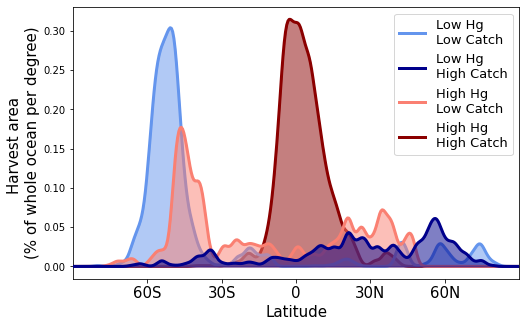

In [33]:
from scipy.ndimage import gaussian_filter1d

hhll_all = hhll*landnan

quadnames = ['Low Hg\nLow Catch','Low Hg\nHigh Catch','High Hg\nLow Catch','High Hg\nHigh Catch']
colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red']
colors = ['cornflowerblue','darkblue','salmon','darkred']
zorder = [1, 3, 2, 0]
quadvalues = [-2,-1,1,2]
plt.figure(figsize=(8,5))
total_area = np.nansum(gb_areas*np.where(np.isnan(hhll_all),np.nan,1))
for q,v,color,z in zip(quadnames, quadvalues, colors, zorder):
    lat_area = gb_areas[:,0]*np.sum(hhll_all==v, axis=1)*200/total_area # thousands of km2
    filtered = gaussian_filter1d(lat_area, 3)
    #plt.plot(lat_area, lats, label=q)
    plt.plot(lats, filtered, label=f'{q}', color=color, lw=3, zorder=z)
    plt.fill_between(lats, filtered, alpha=0.5, color=color, zorder=z)
plt.xlabel("Latitude", fontsize=15); plt.xlim(-90,90)
plt.xticks([-60,-30,0,30,60], ['60S', '30S', '0', '30N', '60N'], fontsize=15)
plt.ylabel("Harvest area \n(% of whole ocean per degree)", fontsize=15)
plt.legend(fontsize=13)
plt.savefig("figs/highlow_histogram.png", bbox_inches="tight", dpi=500)
plt.savefig("figs/highlow_histogram.eps", bbox_inches="tight", dpi=500)

In [34]:
for val,name in zip([-2,-1,1,2,0],quadnames+['None']):
    name = name.replace("\n","-")
    thismask = np.where(hhll==val,1,np.nan)
    for category in category_names:
        thishg = np.zeros((360,720))
        thiscatch = np.zeros((360,720))
        for fisher in fishers:
            thishg += np.squeeze(hg_catch[f'{fisher}_{category}'].values)*thismask
            thiscatch += np.squeeze(dhc_catch[f'{fisher}_{category}'].values)*thismask
        print(f'{category},{np.nansum(thishg):.1f},{np.nansum(thiscatch):.1f},{name}')

very low,3.7,213.8,Low Hg-Low Catch
low,1284.1,11321.4,Low Hg-Low Catch
medium,13.0,77.5,Low Hg-Low Catch
high,0.6,2.4,Low Hg-Low Catch
albacore,2.5,15.4,Low Hg-Low Catch
bigeye,0.5,2.4,Low Hg-Low Catch
skipjack,0.1,1.0,Low Hg-Low Catch
yellowfin,0.1,2.4,Low Hg-Low Catch
other tunas,0.7,8.5,Low Hg-Low Catch
blue marlin,0.0,0.0,Low Hg-Low Catch
billfish,2.1,4.6,Low Hg-Low Catch
king mackerel,0.0,0.0,Low Hg-Low Catch
pollock,0.0,0.0,Low Hg-Low Catch
salmon,1.3,46.1,Low Hg-Low Catch
shark_high,94.9,182.7,Low Hg-Low Catch
shark_low,0.0,0.0,Low Hg-Low Catch
very low,6381.6,243760.8,Low Hg-High Catch
low,395183.7,5941287.7,Low Hg-High Catch
medium,119387.9,739586.8,Low Hg-High Catch
high,15484.2,50776.5,Low Hg-High Catch
albacore,330.2,2000.8,Low Hg-High Catch
bigeye,836.1,3536.6,Low Hg-High Catch
skipjack,2986.3,21488.9,Low Hg-High Catch
yellowfin,1023.1,14787.9,Low Hg-High Catch
other tunas,6185.8,97257.6,Low Hg-High Catch
blue marlin,54.4,234.3,Low Hg-High Catch
billfish,1827.5,3917.2,Low